In [7]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from scipy import stats as stats
import seaborn as sns
%matplotlib inline

##### 1.Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions

In [9]:
claim_data=pd.read_csv('claims.csv')
cust_data = pd.read_csv('cust_demographics.csv')

In [10]:
cust_claim = pd.merge(cust_data,claim_data,left_on='CUST_ID',right_on='customer_id',how='left')
cust_claim

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1088,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1089,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1090,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


##### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance

In [12]:
cust_claim.info()
#Based on the below output:
## claim_amount should be an interger datatype 
## claim_date can be datetime type.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1092 non-null   int64  
 1   gender               1092 non-null   object 
 2   DateOfBirth          1092 non-null   object 
 3   State                1092 non-null   object 
 4   Contact              1092 non-null   object 
 5   Segment              1092 non-null   object 
 6   claim_id             1085 non-null   float64
 7   customer_id          1085 non-null   float64
 8   incident_cause       1085 non-null   object 
 9   claim_date           1085 non-null   object 
 10  claim_area           1085 non-null   object 
 11  police_report        1085 non-null   object 
 12  claim_type           1085 non-null   object 
 13  claim_amount         1020 non-null   object 
 14  total_policy_claims  1075 non-null   float64
 15  fraudulent           1085 non-null   o

In [13]:
###3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign
cust_claim['claim_amount'] = cust_claim.claim_amount.str.lstrip('$')
cust_claim['claim_amount'] = pd.to_numeric(cust_claim.claim_amount)
cust_claim.claim_amount

0        2980.0
1        2980.0
2        3369.5
3        1950.0
4        1680.0
         ...   
1087     1770.0
1088     2800.0
1089    33080.0
1090     2840.0
1091     1490.0
Name: claim_amount, Length: 1092, dtype: float64

##### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [15]:
cust_claim['flag'] = np.where((cust_claim.claim_type == 'Injury only') & (cust_claim.police_report == 'No'),1,0)

In [16]:
#cust_claim.loc[cust_claim.flag == 1,:]

#####  5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [18]:
cust_claim.loc[cust_claim.CUST_ID.duplicated(),:]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,0
5,47830476,Female,01-May-86,MA,413-187-7945,Silver,91609100.0,47830476.0,Natural causes,04/12/2017,Auto,Unknown,Material only,1440.0,1.0,No,0
7,19269962,Male,13-May-77,NV,956-871-8691,Gold,39219616.0,19269962.0,Other causes,09/26/2018,Auto,No,Material only,2240.0,2.0,No,0
9,21831191,Male,17-May-77,NH,419-712-8513,Gold,91475471.0,21831191.0,Driver error,02/09/2018,Auto,Unknown,Material and injury,36810.0,1.0,No,0
625,84147585,Male,18-Oct-72,AK,743-569-4783,Gold,78221963.0,84147585.0,Driver error,04/10/2018,Auto,Yes,Injury only,14430.0,4.0,No,0
627,85357756,Male,02-Jan-70,PA,915-698-3649,Platinum,1654201.0,85357756.0,Driver error,06/23/2018,Auto,Unknown,Material only,2510.0,1.0,No,0
629,53539195,Male,02-Oct-89,NV,914-342-8239,Gold,41779510.0,53539195.0,Driver error,10/03/2018,Home,No,Injury only,25040.0,1.0,No,1


In [19]:
cust_claim.drop_duplicates('customer_id',keep='last',inplace = True)

In [20]:
# since it retains last data with NULL values, Deleting the NULL 
cust_claim.dropna(subset = 'customer_id',inplace = True)

In [21]:
cust_claim

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,0
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,0
5,47830476,Female,01-May-86,MA,413-187-7945,Silver,91609100.0,47830476.0,Natural causes,04/12/2017,Auto,Unknown,Material only,1440.0,1.0,No,0
7,19269962,Male,13-May-77,NV,956-871-8691,Gold,39219616.0,19269962.0,Other causes,09/26/2018,Auto,No,Material only,2240.0,2.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,0
1088,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,0
1089,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,0
1090,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,0


##### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [23]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1078 entries, 0 to 1091
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1078 non-null   int64  
 1   gender               1078 non-null   object 
 2   DateOfBirth          1078 non-null   object 
 3   State                1078 non-null   object 
 4   Contact              1078 non-null   object 
 5   Segment              1078 non-null   object 
 6   claim_id             1078 non-null   float64
 7   customer_id          1078 non-null   float64
 8   incident_cause       1078 non-null   object 
 9   claim_date           1078 non-null   object 
 10  claim_area           1078 non-null   object 
 11  police_report        1078 non-null   object 
 12  claim_type           1078 non-null   object 
 13  claim_amount         1013 non-null   float64
 14  total_policy_claims  1068 non-null   float64
 15  fraudulent           1078 non-null   object

In [24]:
cust_claim['total_policy_claims']=np.where(cust_claim.total_policy_claims.isna(),cust_claim['total_policy_claims'].mode(),cust_claim['total_policy_claims']) 

In [25]:
cust_claim.total_policy_claims.value_counts()

total_policy_claims
1.0    789
2.0    105
3.0     85
4.0     59
5.0     27
6.0     10
7.0      2
8.0      1
Name: count, dtype: int64

In [26]:
# replace continuous variable with mean()
cust_claim['claim_amount'] = np.where(cust_claim.claim_amount.isna(),cust_claim.claim_amount.mean().round(2),cust_claim['claim_amount'])

In [27]:
cust_claim.DateOfBirth

0       12-Jan-79
1       13-Jan-70
3       11-Mar-84
5       01-May-86
7       13-May-77
          ...    
1087    15-Mar-81
1088    07-Jul-96
1089    11-Apr-90
1090    22-Oct-64
1091    12-Jul-95
Name: DateOfBirth, Length: 1078, dtype: object

In [28]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1078 entries, 0 to 1091
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1078 non-null   int64  
 1   gender               1078 non-null   object 
 2   DateOfBirth          1078 non-null   object 
 3   State                1078 non-null   object 
 4   Contact              1078 non-null   object 
 5   Segment              1078 non-null   object 
 6   claim_id             1078 non-null   float64
 7   customer_id          1078 non-null   float64
 8   incident_cause       1078 non-null   object 
 9   claim_date           1078 non-null   object 
 10  claim_area           1078 non-null   object 
 11  police_report        1078 non-null   object 
 12  claim_type           1078 non-null   object 
 13  claim_amount         1078 non-null   float64
 14  total_policy_claims  1078 non-null   float64
 15  fraudulent           1078 non-null   object

##### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria Children < 18, Youth 18-30, Adult 30-60, Senior  > 60 

In [30]:
current_year = dt.datetime.now().year
cust_claim['DateOfBirth'] = pd.to_datetime(cust_claim.DateOfBirth,format='%d-%b-%y')
cust_claim['DateOfBirth']= np.where(cust_claim.DateOfBirth.dt.year > current_year, cust_claim.DateOfBirth - dt.timedelta(days=365.25*100), cust_claim.DateOfBirth )
cust_claim['Age'] = current_year - cust_claim.DateOfBirth.dt.year
cust_claim['Age_category'] = np.where(cust_claim.Age < 18,'children',
                                      (np.where((cust_claim.Age > 18) & (cust_claim.Age <30),'youth',
                                      (np.where((cust_claim.Age > 30) & (cust_claim.Age <60),'Adult','Senior')))))
cust_claim

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_category
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,0,45,Adult
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,0,54,Adult
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,0,40,Adult
5,47830476,Female,1986-05-01,MA,413-187-7945,Silver,91609100.0,47830476.0,Natural causes,04/12/2017,Auto,Unknown,Material only,1440.0,1.0,No,0,38,Adult
7,19269962,Male,1977-05-13,NV,956-871-8691,Gold,39219616.0,19269962.0,Other causes,09/26/2018,Auto,No,Material only,2240.0,2.0,No,0,47,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,0,43,Adult
1088,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,0,28,youth
1089,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,0,34,Adult
1090,11256802,Female,1964-10-22,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,0,60,Senior


##### 8. What is the average amount claimed by the customers from various segments?

In [32]:

cust_claim.groupby('Segment')['claim_amount'].mean()

Segment
Gold        12846.386199
Platinum    12371.645014
Silver      12267.146590
Name: claim_amount, dtype: float64

In [33]:
###9. What is the total claim amount based on incident cause for all the claims 
### that have been done at least 20 days prior to 1st of October, 2018.

In [34]:
given_date = pd.to_datetime('10-01-2018',format = '%m-%d-%Y')
prior_date = given_date-pd.Timedelta(days=20)
cust_claim['claim_date'] = pd.to_datetime(cust_claim.claim_date,format= '%m/%d/%Y')
cust_claim.loc[cust_claim.claim_date < prior_date,:].groupby('incident_cause')['claim_amount'].sum()

incident_cause
Crime                  721937.45
Driver error          3315847.88
Natural causes        1312744.91
Other causes          3723147.31
Other driver error    3277533.37
Name: claim_amount, dtype: float64

In [35]:
cust_claim.incident_cause.value_counts()

incident_cause
Other causes          284
Driver error          259
Other driver error    243
Natural causes        185
Crime                 107
Name: count, dtype: int64

In [36]:
###10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [37]:
cust_claim_sum = cust_claim.loc[(cust_claim.Age_category == 'Adult') & (((cust_claim.State == 'TX') | (cust_claim.State == 'DE') | (cust_claim.State == 'AK')) & ((cust_claim.incident_cause =='Driver error')|(cust_claim.incident_cause =='Other driver error')))]['incident_cause'].value_counts()
#cust_claim_sum.loc[(cust_claim_sum.incident_cause =='Driver error')|(cust_claim_sum.incident_cause =='Other driver error')]['incident_cause'].value_counts()
cust_claim_sum

incident_cause
Driver error          15
Other driver error    11
Name: count, dtype: int64

In [38]:
##11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. 
###Represent the claim amount as a percentage on the pie chart

<Axes: ylabel='claim_amount'>

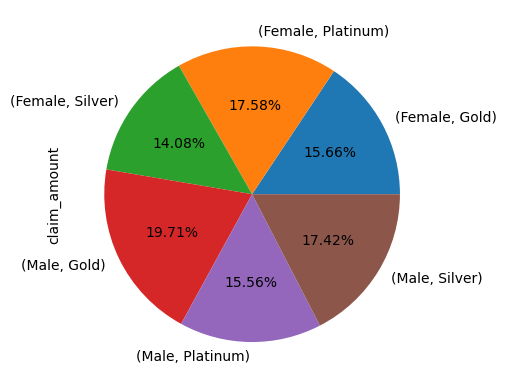

In [39]:
claim_sum = cust_claim.groupby(['gender','Segment'])['claim_amount'].sum()
claim_sum.plot(kind='pie',autopct='%.2f%%')

In [40]:
###12. Among males and females, which gender had claimed the most for any type of driver related issues?
###E.g. This metric can be compared using a bar chart

<Axes: xlabel='gender', ylabel='Driver retaled issues'>

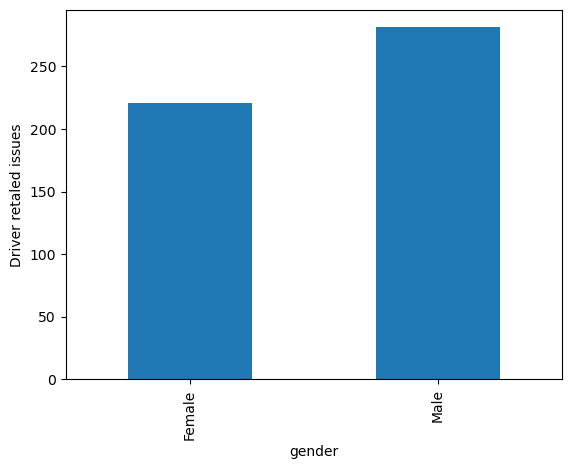

In [41]:
claim_summ1 = cust_claim.loc[(cust_claim.incident_cause == 'Driver error') |(cust_claim.incident_cause == 'Other driver error'),:].groupby('gender')['incident_cause'].count()
claim_summ1.plot(kind='bar',ylabel='Driver retaled issues')

In [42]:
###13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart?

<Axes: xlabel='Age_category'>

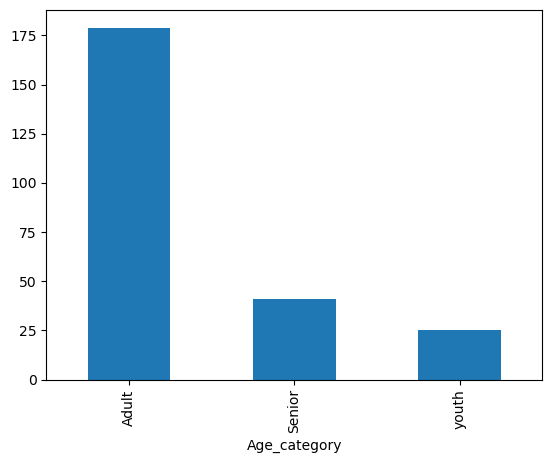

In [43]:
cust_claim.loc[cust_claim.fraudulent=='Yes',:].groupby('Age_category')['fraudulent'].count().plot(kind = 'bar')


### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.  

<Axes: xlabel='DateOfBirth'>

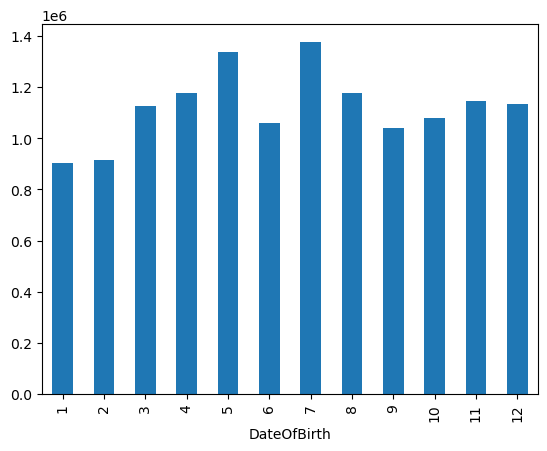

In [45]:
cust_claim.groupby(cust_claim.DateOfBirth.dt.month)['claim_amount'].sum().plot(kind='bar')

#### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

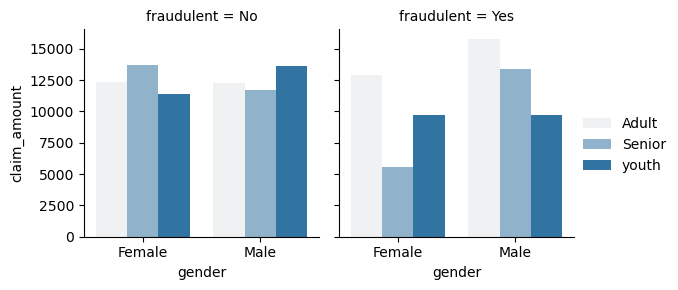

In [118]:
avg_claim = cust_claim.groupby(['gender', 'Age_category', 'fraudulent'])['claim_amount'].mean().reset_index()
g = sns.FacetGrid(avg_claim,col='fraudulent')
g.map_dataframe(sns.barplot,x ='gender',y = 'claim_amount',hue = 'Age_category').add_legend()
plt.show()


#### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 

##### 16. Is there any similarity in the amount claimed by males and females?

##### 1. Define Null and alternate hypothesis:
        H0 : Amount claimed by male and female are not similar
        Ha : Amount claimed by male and female are similar
##### 2.  At CI 95%, P_value = 0.05
##### 3. Perform the test
        T-test/Z-test

In [146]:
cust_summ_female =cust_claim.loc[(cust_claim.gender =='Female'),'claim_amount']
cust_summ_male = cust_claim.loc[(cust_claim.gender =='Male'),'claim_amount']
cust_summ_female

stats.ttest_ind(cust_summ_female,cust_summ_male)


TtestResult(statistic=-0.9630529928009985, pvalue=0.3357373064192417, df=1076.0)

In [148]:
print("Mean of amount claimed by female:",cust_summ_female.mean())
print("Mean of amount claimed by male:",cust_summ_male.mean())

Mean of amount claimed by female: 12100.692049335861
Mean of amount claimed by male: 12884.829655172412


#### 4. Rejection Rule:
    New P-value is greater than the p-value (0.05), so accepting null hypothesis
#### 5.Business conclusion:
    The mount claimed by Male are not similar to amount claimed by female.

### 17. Is there any relationship between age category and segment?

#### i) Define Null and alternate hypothesis:
    H0 - there is no dependancy between age category and segment
    Ha - Age category and segment are dependant
#### ii) At CI =95% P-value = 0.05
#### iii) Perform hypothesis test:
    Chi-Square test is used to find the relationship between 2 categorical variables.
    observed frequency tables,

In [171]:
age_seg = pd.crosstab(index= cust_claim.Age_category,columns= cust_claim.Segment)
age_seg

Segment,Gold,Platinum,Silver
Age_category,,,
Adult,270,255,247
Senior,53,62,50
youth,48,44,49


In [173]:
stats.chi2_contingency(age_seg)

Chi2ContingencyResult(statistic=1.896388291302472, pvalue=0.7548084418683276, dof=4, expected_freq=array([[265.68831169, 258.52690167, 247.78478664],
       [ 56.78571429,  55.25510204,  52.95918367],
       [ 48.52597403,  47.21799629,  45.25602968]]))

#### iv) Rejection Rule:
    New p-Value is greater than p-value=0.05
    chi-score is less than the cut-off values which is 1.967
    Accepting  Null hypothesis

#### v) Business conclusion:
 There is no dependancy between Age category and segment.

#### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [ ]:
### i) There is no data for current year 2024. Latest claim entry data available in the table is from 2018. So, assumed that
###    the current year as 2018.

In [ ]:
curr_claim = cust_claim.loc[cust_claim.claim_date.dt.year > 2017,:]

#### 1. Define Null Hypothesis, H0: 
             
             u > 10,000
                        
#### 2. Define Alternate Hypothesis, Ha:
            
           u < 10,000
            
#### 3. At CI = 95%:

            p-value = 0.05
            p-cutoff = 1.967
    
#### 4. Performing the test:
            
            z test or t -test---> sample(ttest)

In [ ]:
stats.ttest_1samp(curr_claim.claim_amount, 10,000)

#### Rejection Rule:
    New P-value is less than the p-value (0.05), so rejecting the null hypothesis.

#### Business conclusion:
    We can't say that the claim amount has increased significantly as compared to fiscal year 2016-2017 

#### 19. Is there any difference between age groups and insurance claims?

In [163]:
s1= cust_claim.loc[cust_claim.Age_category == 'youth','total_policy_claims']
s2= cust_claim.loc[cust_claim.Age_category == 'Adult','total_policy_claims']
s3= cust_claim.loc[cust_claim.Age_category == 'Senior','total_policy_claims']

In [165]:
print("Mean claim amount for the age category Youth is: ",s1.mean())
print("Mean claim amount for the age category Adult is: ",s2.mean())
print("Mean claim amount for the age category Senior is: ",s3.mean())

Mean claim amount for the age category Youth is:  1.6595744680851063
Mean claim amount for the age category Adult is:  1.5660621761658031
Mean claim amount for the age category Senior is:  1.6


#### i) Define Null Hypothesis, H0: 
            
            All age category have same insurance claim

#### ii) Define Alternate Hypothesis, Ha:
            
           All age category have different insurance claim
            
#### iii) At CI = 95%:

            p-value = 0.05
            p-cutoff = 1.967
    
#### iv) Performing the test:
        F- Test or Anova

In [167]:
stats.f_oneway(s1,s2,s3)

F_onewayResult(statistic=0.4174165463740958, pvalue=0.6588531877120991)

#### iv) Rejection rule:
    p-value is high hence accept null hypothesis.
#### V) Business conclusion:
     With the given details we cant conclude that there is difference in age categorys and insurance claims.

#### 20. Is there any relationship between total number of policy claims and the claimed amount?

###### i) Define Null Hypothesis, H0: 
            
            There is no relationship b/w total number of policy claims and the claimed amount

##### ii) Define Alternate Hypothesis, Ha:
            
            There is a relationship b/w total number of policy claims and the claimed amount
            
##### iii) At CI = 95%:

            p-value = 0.05
            p-cutoff = 1.967
    
##### iv) Performing the test:
            
            pearsonr()

In [ ]:
stats.pearsonr(cust_claim.total_policy_claims,cust_claim.claim_amount)

#### Rejection Rule:
    New P-value is greater than the p-value (0.05), so accepting the null hypothesis.

#### Business conclusion:
    There is no relationship b/w total number of policy claims and the claimed amount